In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
def scatter_plt(
    data, x_var, y_var, x_log=True, n_sample=None, smooth=False, frac=0.1, seed=123):
    """
    Scatter plot (x with log10)
    Param:
        - n_sample: size of sample or None
        - lowess: plot smooth curve or not
        - frac: lowess frac
    """
    if n_sample:
        data = data.sample(n_sample, random_state=seed)
    data_sw = data[data['sw'] == 1]
    data_resto = data[data['sw'] == 0]
    fig, ax = plt.subplots()
    if x_log:
        ax.set_xscale('log')
        ax.set_xlim(left=10, right=10**8)
    plt.scatter(x_var, y_var, linewidth=0, c='darkolivegreen', s=4, data=data_resto)
    plt.scatter(x_var, y_var, linewidth=0, c='firebrick', s=4, data=data_sw)
    if smooth:
        x_data = data[x_var]
        if x_log:
            x_data = np.log10(data[x_var])
        smooth_data = lowess(data[y_var], x_data, frac=frac)
        x_smooth = smooth_data[:,0]
        if x_log:
            x_smooth = 10**smooth_data[:,0]
        line = ax.plot(
            x_smooth, smooth_data[:,1], color='black', lw=1.0, ls='--')
    ax.axhline(0, ls='--', color='gray', linewidth=0.5)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    return fig, ax


def boxplots_plt(data, x_var, y_var, bins):
    """
    Cut x_var in bins and make one boxplot per bin
    """
    freq_bins = pd.cut(np.log10(data[x_var]), bins=bins)
    nobs = freq_bins.value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    fig, ax = plt.subplots()
    ax = sns.boxplot(x=freq_bins, y=data[y_var], showfliers=False)
    ax.axhline(0, ls='--', color='black', linewidth=0.5)
    labels_ypos = ax.get_ylim()[1]
    for i in range(len(nobs)):
        ax.text(
            i, labels_ypos, nobs[i], horizontalalignment='center', size='small'
            , color='black', weight='semibold')
    return fig, ax


def scatter_color_plt(data, x_var, y_var, color_var, n_sample=None, seed=123):
    if n_sample:
        data = data.sample(n_sample, random_state=seed)
    fig, ax = plt.subplots()
    scatter = ax.scatter(
        x_var, y_var, c=color_var, cmap='viridis'
        ,s=1, norm=matplotlib.colors.LogNorm(), data=data)
    cbar = plt.colorbar(scatter, ax=ax)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    cbar.ax.set_title('freq.')
    return fig, ax


def add_ranking_col(df, colname):
    """
    Add column to df with 'rank_' prefix with the rank of the absolute value
    """
    col_abs = df[colname].abs()
    newname = 'rank_'+colname+'_abs'
    df[newname] = stats.rankdata(col_abs, "average")/len(col_abs)
    return df

## Data

In [3]:
dat = pd.read_csv("results/csv/biasbyword_full-C3_HE-SHE.csv")

## Vectores W2V

### Similitud (w,He)

Dot product <w,he> sin normalizar

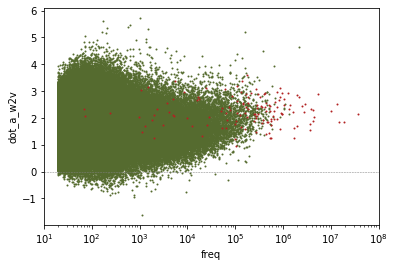

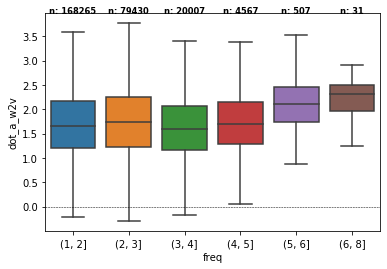

In [4]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_a_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_a_w2v', bins=[1,2,3,4,5,6,8])

Coseno(w,he) (dot product normalizado)

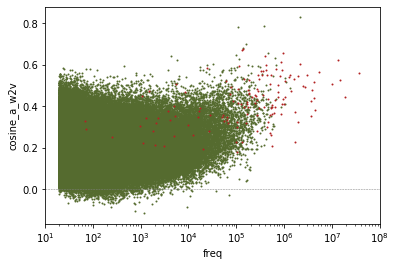

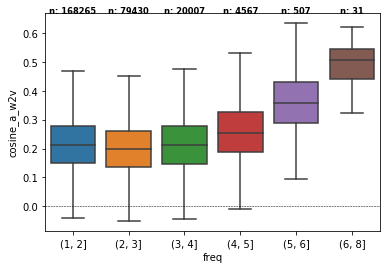

In [5]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_w2v', bins=[1,2,3,4,5,6,8])

### Norma L2

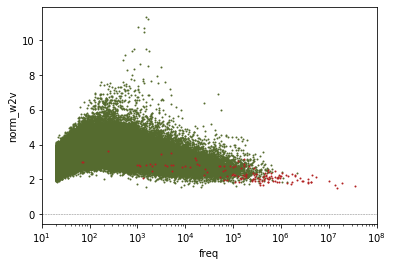

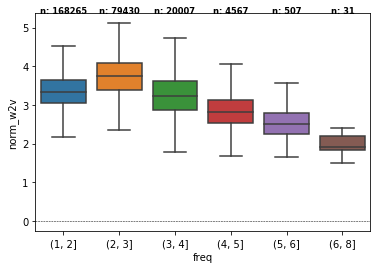

In [6]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_w2v', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

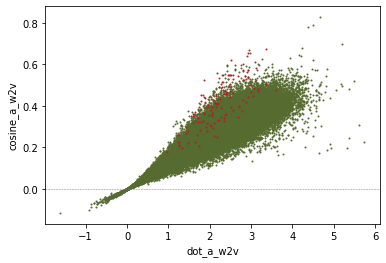

In [7]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_a_w2v', y_var='cosine_a_w2v', x_log=False)

### Similitud (w,She)

Dot product <w,she> sin normalizar

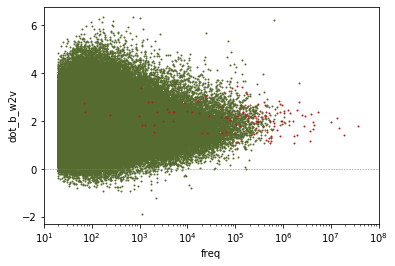

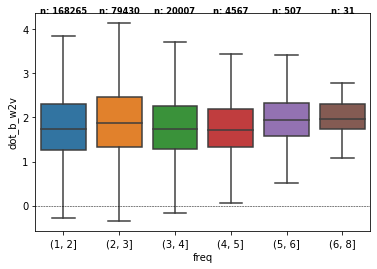

In [8]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_b_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_b_w2v', bins=[1,2,3,4,5,6,8])

Coseno(w,she) (dot product normalizado)

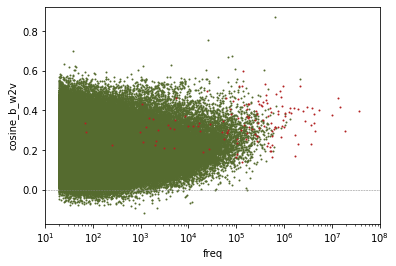

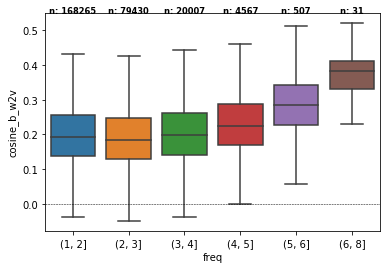

In [9]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_w2v', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

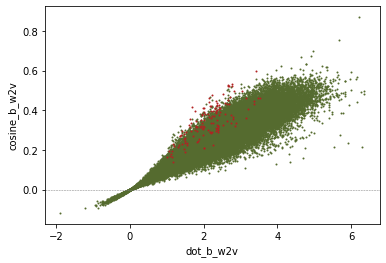

In [10]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_b_w2v', y_var='cosine_b_w2v', x_log=False)

La norma tiende a ser menor en palabras de mayor frecuencia

Cuando se normalizan los vectores la similitud crece relativamente más en este grupo de palabras 

Entonces la similitud coseno tiende a ser más alta en stopwords y palabras muy frecuentes

¿El problema es de la métrica pero no de los WE? ¿La correlación "espuria" entre sesgo y frecuencia ocurre solamente por normalizar los vectores? 

### Sesgo

**Medido con diferencia de dot product**

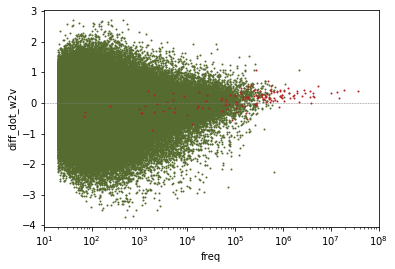

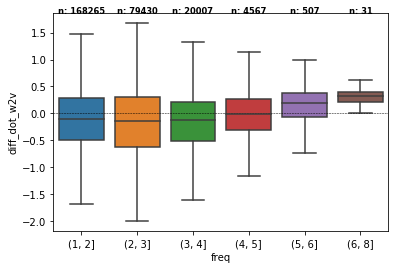

In [11]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_dot_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_dot_w2v', bins=[1,2,3,4,5,6,8])

In [12]:
dat.sort_values("diff_dot_w2v", ascending=False).head(20)\
    [['word','freq','dot_a_w2v','dot_b_w2v','diff_dot_w2v']]

,word,freq,dot_a_w2v,dot_b_w2v,diff_dot_w2v
41262,matthäus,451,3.272790,0.549848,2.722942
176921,debreceni,41,2.503404,-0.214724,2.718129
58525,dukla,259,3.413854,0.700317,2.713537
77040,budějovice,166,2.994618,0.306232,2.688386
79007,vermes,160,3.067551,0.408685,2.658866
64484,beckenbauer,221,3.359938,0.703120,2.656818
152181,zbrojovka,54,2.159986,-0.466910,2.626895
100951,újpest,106,3.122125,0.497723,2.624403
97281,jaromir,113,2.460933,-0.130126,2.591059
84484,honvéd,143,3.920857,1.330861,2.589996


Las palabras con mayor estereotipo masculino son nombres propios en gral relacionados con el deporte

**Medido con diferencia de coseno**

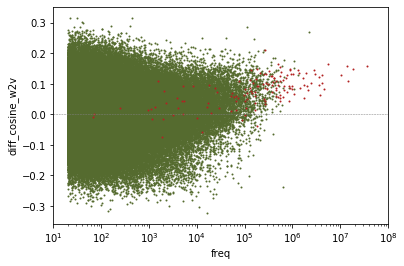

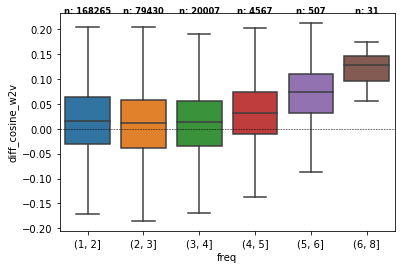

In [13]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_w2v')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_w2v', bins=[1,2,3,4,5,6,8])

In [14]:
dat.sort_values("diff_cosine_w2v", ascending=False).head(20)\
    [['word','freq','cosine_a_w2v','cosine_b_w2v','diff_cosine_w2v']]

,word,freq,cosine_a_w2v,cosine_b_w2v,diff_cosine_w2v
255774,panenka,22,0.402369,0.086143,0.316226
41262,matthäus,451,0.370391,0.054200,0.316191
208535,hoeneß,31,0.416344,0.101589,0.314755
181559,zenden,40,0.285246,-0.016604,0.301850
176921,debreceni,41,0.279668,-0.020893,0.300561
79007,vermes,160,0.327801,0.038038,0.289762
44899,amassing,396,0.503203,0.214584,0.288619
486,himself,110352,0.782726,0.495000,0.287726
227900,stammler,27,0.528108,0.242292,0.285816
192207,poborský,36,0.427310,0.142453,0.284857


Las palabras con mayor sesgo masculino siguen siendo nombres propios, pero crece el sesgo relativo de los stopwords/alta frecuencia, como se ven en los gráficos

Correlación entre rank(abs(diff_dot)) y rank(abs(diff_cosine)) ( _cuánto cambia la "relevancia" del bias al normalizar los vectores_ )

In [15]:
dat = add_ranking_col(dat, "diff_dot_w2v")
dat = add_ranking_col(dat, "diff_cosine_w2v")

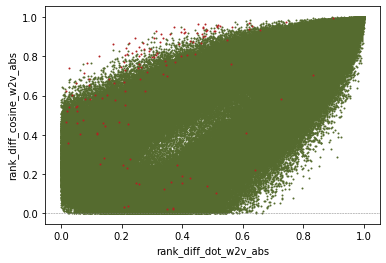

In [16]:
fig_, ax_ = scatter_plt(
    dat, x_var='rank_diff_dot_w2v_abs', y_var='rank_diff_cosine_w2v_abs', x_log=False)

El sesgo tiende a crecer relativamente más en los stopwords cuando se normalizan los vectores

## Vectores GloVe

### Similitud (w,He)

Dot product <w,he> sin normalizar

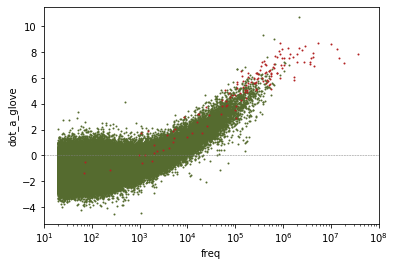

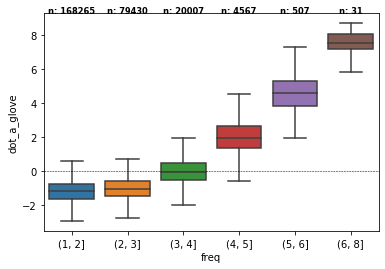

In [17]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_a_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_a_glove', bins=[1,2,3,4,5,6,8])

Coseno(w,he) (dot product normalizado)

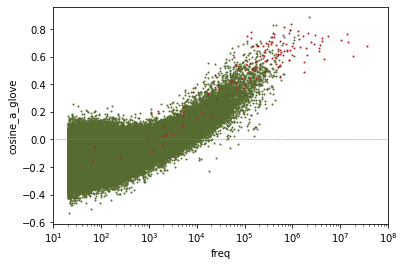

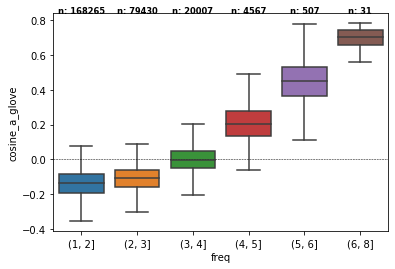

In [18]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_glove', bins=[1,2,3,4,5,6,8])

### Norma L2

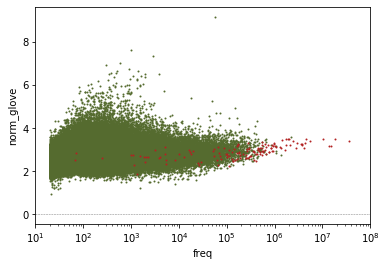

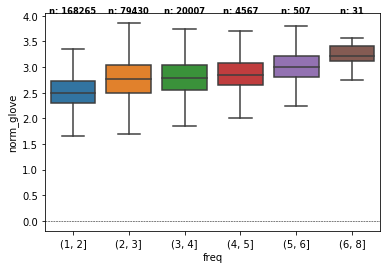

In [19]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_glove', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

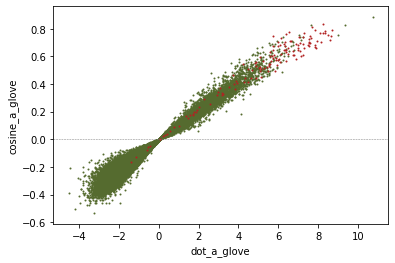

In [20]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_a_glove', y_var='cosine_a_glove', x_log=False)

### Similitud (w,She)

Dot product <w,she> sin normalizar

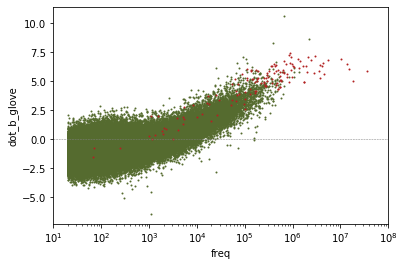

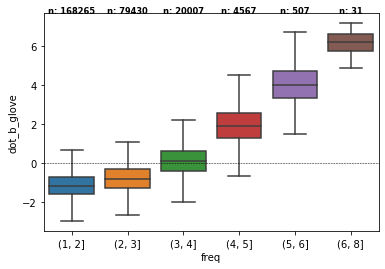

In [21]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_b_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_b_glove', bins=[1,2,3,4,5,6,8])

Coseno(w,she) (dot product normalizado)

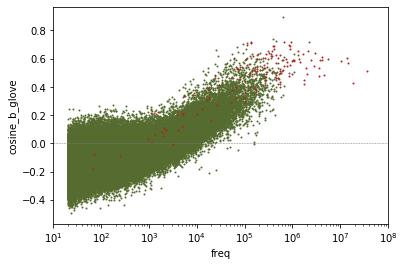

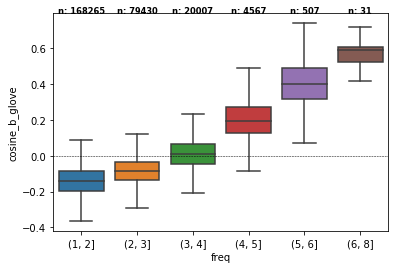

In [22]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_glove', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

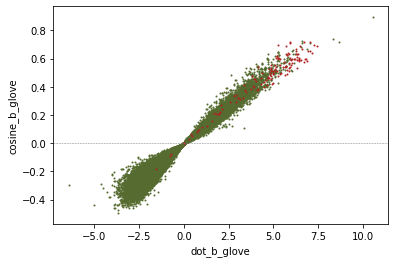

In [23]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_b_glove', y_var='cosine_b_glove', x_log=False)

En el caso de GloVe, la normas tienden crecer en promedio con la frecuencia de las palabras

Los dot products arrojan valores significativamente más altos para palabras más frecuentes, tanto contra _he_ como contra _she_

Cuando se normalizan los vectores la similitud cae para las palabras frecuentes en términos relativos, pero la brecha en el valor absoluto de la similitud con respecto al resto de las palabras sigue siendo evidente

La similitud tiende a crecer con la frecuencia, ya sea que se mida con dot product o con coseno

En este caso, a diferencia de W2V, parece que la normalización de los vectores no altera los resultados que se observan en la relación entre sesgo y frecuencia

### Sesgo

**Medido con diferencia de dot product**

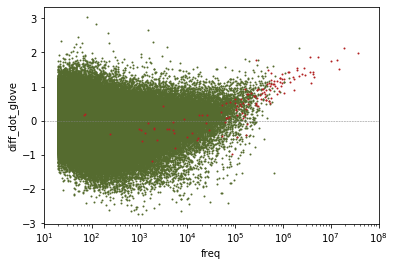

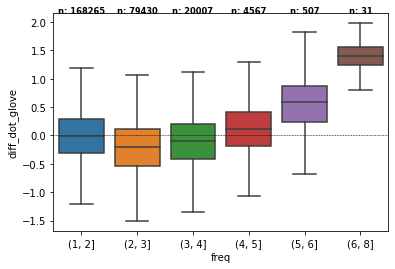

In [24]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_dot_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_dot_glove', bins=[1,2,3,4,5,6,8])

In [25]:
dat.sort_values("diff_dot_glove", ascending=False).head(20)\
    [['word','freq','dot_a_glove','dot_b_glove','diff_dot_glove']]

,word,freq,dot_a_glove,dot_b_glove,diff_dot_glove
118772,coules,81,-0.347666,-3.398107,3.050440
91187,midiinstrument,126,1.023790,-1.805678,2.829469
19327,firstelected,1508,1.972163,-0.687563,2.659726
65551,retrosheet,216,0.471306,-2.098210,2.569517
155582,activeservice,51,3.373350,0.922919,2.450431
246511,desnouettes,23,-0.298442,-2.636143,2.337701
16621,diode,1903,0.791309,-1.515090,2.306399
63348,milw,228,0.535347,-1.748444,2.283792
138115,jetfoil,63,0.691093,-1.579577,2.270670
164794,sinauer,47,0.581465,-1.671875,2.253340


Entre las palabras con mayor estereotipo masculino aparecen algunos nombres propios masculinos (Desnouettes, Chaerephon), algunas palabras potencialmente "mal tokenizadas" (first elected, midi instrument, active service)

No aparecen tantas stopwords porque la diferencia en frecuencia he-she no es tan alta (si fuera mayor, se acentúa el patrón de correlación sesgo-frecuencia, como vimos cuando se usan otros pronombres)

**Medido con diferencia de coseno**

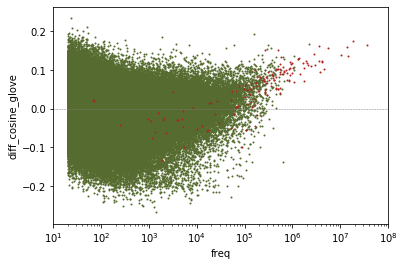

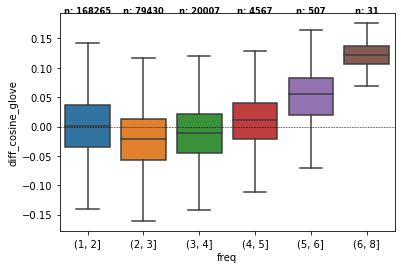

In [26]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_glove')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_glove', bins=[1,2,3,4,5,6,8])

In [27]:
dat.sort_values("diff_cosine_glove", ascending=False).head(20)\
    [['word','freq','cosine_a_glove','cosine_b_glove','diff_cosine_glove']]

,word,freq,cosine_a_glove,cosine_b_glove,diff_cosine_glove
246511,desnouettes,23,-0.029473,-0.263289,0.233816
158991,tode,50,-0.039771,-0.251148,0.211377
235250,eher,25,-0.100123,-0.309344,0.209221
209263,minger,31,-0.074503,-0.277398,0.202895
176792,chaerephon,41,0.018997,-0.182723,0.201720
151475,luminaires,54,0.014716,-0.181929,0.196645
263351,rogožarski,21,0.100186,-0.096167,0.196353
304,led,160312,0.509137,0.314989,0.194149
270443,piliocolobus,20,-0.112708,-0.305953,0.193245
234189,autotools,25,-0.134754,-0.326670,0.191916


Entre las palabras con mayor sesgo masculino priman los nombres propios

Correlación entre rank(abs(diff_dot)) y rank(abs(diff_cosine)) ( _cuánto cambia la "relevancia" del bias al normalizar los vectores_ )

In [28]:
dat = add_ranking_col(dat, "diff_dot_glove")
dat = add_ranking_col(dat, "diff_cosine_glove")

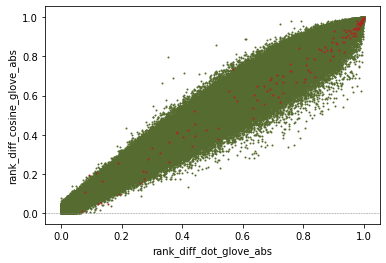

In [29]:
fig_, ax_ = scatter_plt(
    dat, x_var='rank_diff_dot_glove_abs', y_var='rank_diff_cosine_glove_abs', x_log=False)

El sesgo **no** tiende a crecer relativamente más en los stopwords cuando se normalizan los vectores

El hecho de que stopwords/palabras frecuentes tengan en promedio mayor sesgo no parece tener que ver con la normalización -- sino con que el producto vectorial entre he/she y las palabras es en promedio más alto para palabras muy frecuentes 

## Vectores PPMI

Se usan los vectores de la matriz de PPMI con todas las dimensiones (es decir, de las palabras de frec. por lo menos igual a 20)

In [30]:
print(f"La dimensión de los vectores es igual a {dat.idx.max()}")

La dimensión de los vectores es igual a 272809


### Similitud (w,He)

Dot product <w,he> sin normalizar

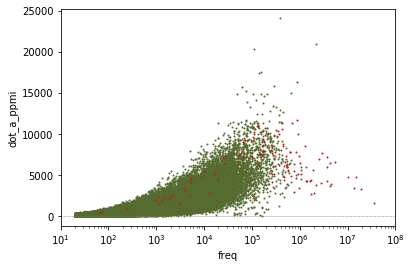

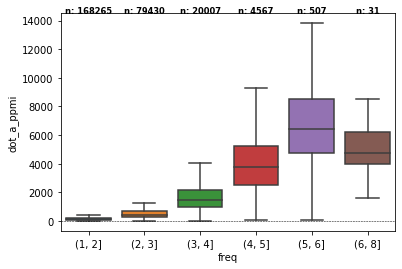

In [31]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_a_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_a_ppmi', bins=[1,2,3,4,5,6,8])

Coseno(w,he) (dot product normalizado)

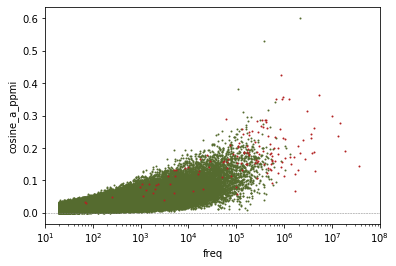

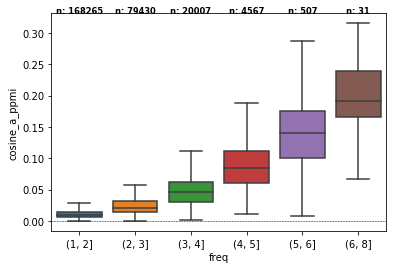

In [32]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_a_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_a_ppmi', bins=[1,2,3,4,5,6,8])

### Norma L2

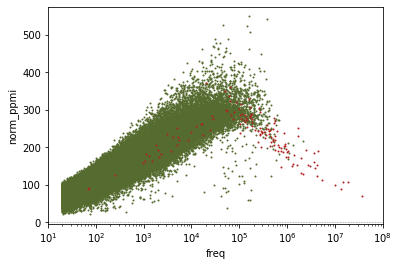

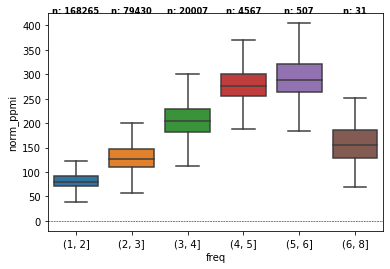

In [33]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='norm_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='norm_ppmi', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

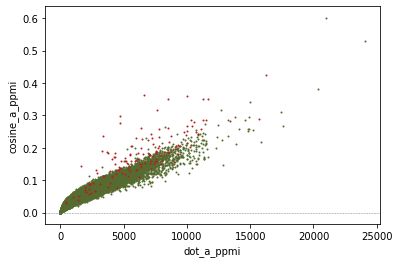

In [34]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_a_ppmi', y_var='cosine_a_ppmi', x_log=False)

### Similitud (w,She)

Dot product <w,she> sin normalizar

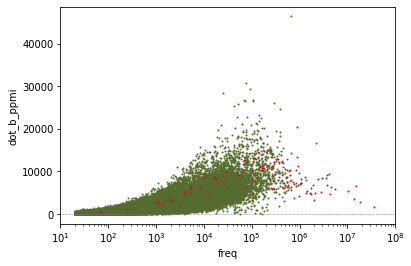

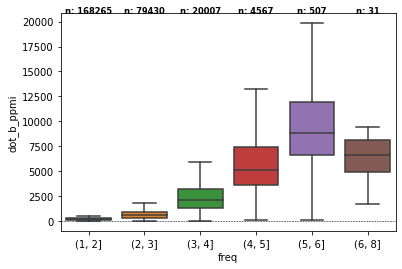

In [35]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='dot_b_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='dot_b_ppmi', bins=[1,2,3,4,5,6,8])

Coseno(w,she) (dot product normalizado)

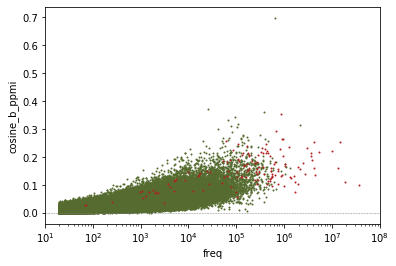

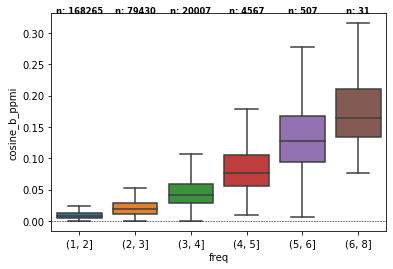

In [36]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='cosine_b_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='cosine_b_ppmi', bins=[1,2,3,4,5,6,8])

Correlación entre dot y coseno

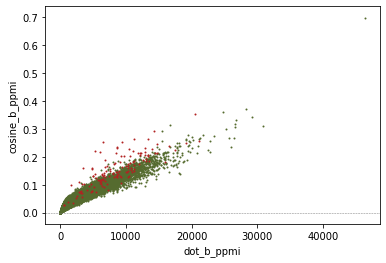

In [37]:
fig_, ax_ = scatter_plt(
    dat, x_var='dot_b_ppmi', y_var='cosine_b_ppmi', x_log=False)

La norma de los vectores PPMI tiende a ser baja en palabras muy frecuentes

Entonces cuando se normalizan los vectores, la similitud tiende a crecer relativamente más en estas palabras (y también en las muy poco frecuentes)

### Sesgo

**Medido con diferencia de dot product**

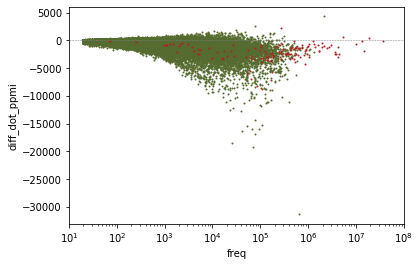

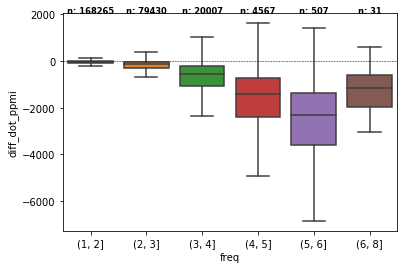

In [38]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_dot_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_dot_ppmi', bins=[1,2,3,4,5,6,8])

In [39]:
dat.sort_values("diff_dot_ppmi", ascending=False).head(20)\
    [['word','freq','dot_a_ppmi','dot_b_ppmi','diff_dot_ppmi']]

,word,freq,dot_a_ppmi,dot_b_ppmi,diff_dot_ppmi
15,his,2170378,20987.530639,16655.663095,4331.867544
739,appointed,76248,9924.774243,7252.380905,2672.393339
144,against,272169,13376.796108,11188.530386,2188.265722
1966,succeeded,30664,9393.135756,7487.862420,1905.273336
4819,bishops,10789,4159.846554,2537.882015,1621.964539
1884,scored,31972,5220.116741,3663.711912,1556.404829
1192,victory,49028,7740.882826,6201.631181,1539.251646
5989,papal,8151,4299.502796,2792.562035,1506.940762
7443,ecclesiastical,6068,3541.970137,2079.560301,1462.409836
4317,theology,12359,4859.470893,3399.304769,1460.166125


Tópicos de las palabras con mayor estereotipo masculino: 

* deportes
* guerra
* gobierno
* religión

In [40]:
dat.sort_values("diff_dot_ppmi", ascending=True).head(20)\
    [['word','freq','dot_a_ppmi','dot_b_ppmi','diff_dot_ppmi']]

,word,freq,dot_a_ppmi,dot_b_ppmi,diff_dot_ppmi
47,her,647413,15002.865678,46358.982227,-31356.116549
792,actress,71625,7220.459336,26538.097522,-19317.638186
2349,herself,25139,9836.344279,28334.836156,-18498.491877
727,daughter,77091,13906.553164,30814.616219,-16908.063055
1414,girl,41893,8875.218576,25295.354754,-16420.136177
836,woman,67647,10736.205276,26727.099690,-15990.894414
582,mother,93272,13269.572282,29250.283751,-15980.711470
1141,sister,51586,10252.465361,25731.018850,-15478.553489
496,love,108373,11425.980463,26646.392018,-15220.411556
709,singer,77933,8364.304859,22798.295170,-14433.990310


Tópicos de las palabras con mayor estereotipo femenino: 

* artes
* familia

**Medido con diferencia de coseno**

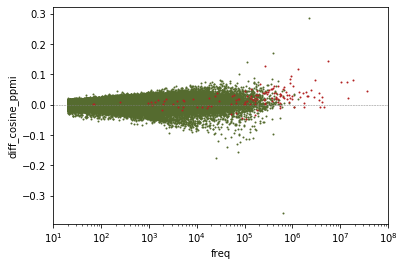

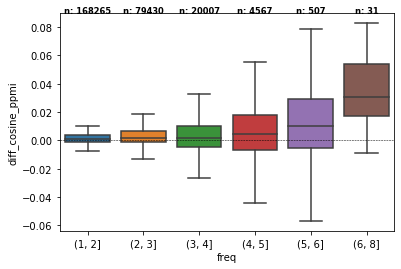

In [41]:
fig_, ax_ = scatter_plt(dat, x_var='freq', y_var='diff_cosine_ppmi')
fig_, ax_ = boxplots_plt(dat, x_var='freq', y_var='diff_cosine_ppmi', bins=[1,2,3,4,5,6,8])

In [42]:
dat.sort_values("diff_cosine_ppmi", ascending=False).head(20)\
    [['word','freq','cosine_a_ppmi','cosine_b_ppmi','diff_cosine_ppmi']]

,word,freq,cosine_a_ppmi,cosine_b_ppmi,diff_cosine_ppmi
15,his,2170378,0.601683,0.315306,0.286376
94,him,384294,0.530221,0.360124,0.170097
5,was,5400678,0.362152,0.217062,0.145090
486,himself,110352,0.380917,0.240704,0.140213
144,against,272169,0.283095,0.156357,0.126738
25,had,1280435,0.351889,0.234695,0.117193
739,appointed,76248,0.198414,0.095741,0.102673
33,but,934794,0.358618,0.265524,0.093093
304,led,160312,0.208470,0.120256,0.088213
35,after,884447,0.350126,0.263865,0.086261


Cuando se normalizan los vectores, aparecen stopwords entre las palabras con mayor sesgo masculino

In [43]:
dat.sort_values("diff_cosine_ppmi", ascending=True).head(20)\
    [['word','freq','cosine_a_ppmi','cosine_b_ppmi','diff_cosine_ppmi']]

,word,freq,cosine_a_ppmi,cosine_b_ppmi,diff_cosine_ppmi
47,her,647413,0.342493,0.698838,-0.356345
2349,herself,25139,0.194585,0.370136,-0.175551
792,actress,71625,0.110275,0.267638,-0.157362
1414,girl,41893,0.159178,0.299579,-0.140400
836,woman,67647,0.202333,0.332607,-0.130275
682,husband,80106,0.168570,0.291007,-0.122438
2205,starred,27065,0.112722,0.233022,-0.120300
436,female,121923,0.090842,0.204076,-0.113233
496,love,108373,0.207147,0.318999,-0.111851
1530,starring,39094,0.096946,0.207342,-0.110396


Cuando se normalizan los vectores, la lista de palabras con mayor sesgo femenino no tiene muchas modificaciones

Correlación entre rank(abs(diff_dot)) y rank(abs(diff_cosine)) ( _cuánto cambia la "relevancia" del bias al normalizar los vectores_ )

In [44]:
dat = add_ranking_col(dat, "diff_dot_ppmi")
dat = add_ranking_col(dat, "diff_cosine_ppmi")

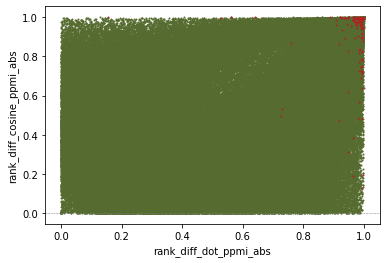

In [49]:
fig_, ax_ = scatter_plt(
    dat, x_var='rank_diff_dot_ppmi_abs', y_var='rank_diff_cosine_ppmi_abs', x_log=False)

La magnitud del sesgo (en rango) varía **muchísimo** cuando no se normalizan los vectores

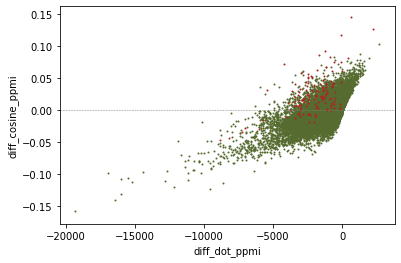

In [52]:
dat_tmp = dat.query("word not in ('him','his','himself','her','hers','herself')") # los saco porque son outliers
fig_, ax_ = scatter_plt(
    dat_tmp, x_var='diff_dot_ppmi', y_var='diff_cosine_ppmi', x_log=False)

Cuando se normalizan los vectores las similitudes (w,she) se reducen relativas a las similitudes (w,he), a tal punto que el sesgo de muchas palabras cambia de signo (cuadrante superior izquierdo)

Los productos <w,she> tienden a ser más altos que los productos <w,he> (**¿por qué?**) -- entonces el sesgo promedio de las palabras medido con dot product es claramente femenino

Cuando los vectores se normalizan esto se revierte: el sesgo promedio de las palabras pasa a ser masculino -- además, el sesgo de los stopwords cambia de signo

Esto puede ser porque la norma de _she_ es bastante mayor que la de _he_ (es probable que sea así si vemos el gráfico de norma PPMI vs. frec.)

In [58]:
norma_he = dat['dot_a_ppmi'] / (dat['norm_ppmi'] * dat['cosine_a_ppmi'])
norma_she = dat['dot_b_ppmi'] / (dat['norm_ppmi'] * dat['cosine_b_ppmi'])

In [62]:
norma_he[0], norma_she[0]

(161.15822691137348, 244.05506300808247)

In [69]:
print(
    f"La norma de HE es mayor que el {(dat['norm_ppmi'] < norma_he[0]).mean():0.2%} de las normas\n"
    ,f"La norma de SHE es mayor que el {(dat['norm_ppmi'] < norma_she[0]).mean():0.2%} de las normas"
)

La norma de HE es mayor que el 87.62% de las normas
 La norma de SHE es mayor que el 97.26% de las normas


Efectivamente es mayor pero no queda claro si significativamente

Veamos qué pasa si la norma de she fuera igual que la de he

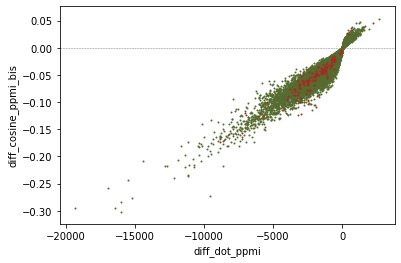

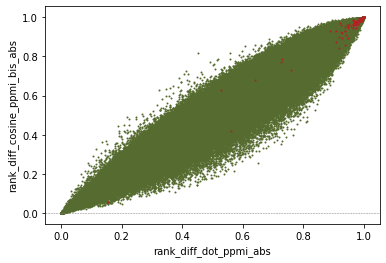

In [72]:
dat_tmp = dat
dat_tmp['cosine_b_ppmi_bis'] = dat_tmp['cosine_b_ppmi'] * (norma_she[0]/norma_he[0])
dat_tmp['diff_cosine_ppmi_bis'] = dat_tmp['cosine_a_ppmi'] - dat_tmp['cosine_b_ppmi_bis']
dat_tmp = add_ranking_col(dat_tmp, 'diff_cosine_ppmi_bis')
dat_tmp = dat_tmp.query("word not in ('him','his','himself','her','hers','herself')") # los saco porque son outliers
fig_, ax_ = scatter_plt(
    dat_tmp, x_var='diff_dot_ppmi', y_var='diff_cosine_ppmi_bis', x_log=False)
fig_, ax_ = scatter_plt(
    dat, x_var='rank_diff_dot_ppmi_abs', y_var='rank_diff_cosine_ppmi_bis_abs', x_log=False)

Efectivamente los cambios tan bruscos entre dot y coseno tienen que ver con la diferencia tan grande entre las normas de he - she

## Correlaciones

Correlaciones entre productos (w,he)

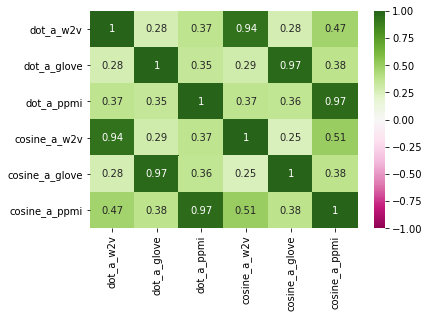

In [80]:
cols = [
    'dot_a_w2v','dot_a_glove','dot_a_ppmi',
    'cosine_a_w2v','cosine_a_glove','cosine_a_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Correlaciones entre productos (w,she)

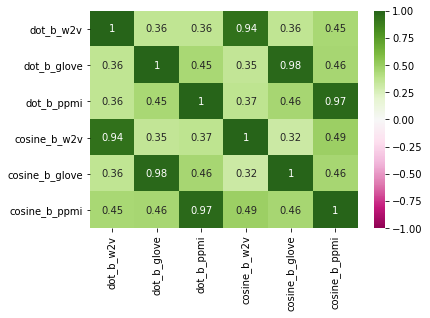

In [81]:
cols = [
    'dot_b_w2v','dot_b_glove','dot_b_ppmi',
    'cosine_b_w2v','cosine_b_glove','cosine_b_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Correlaciones entre métricas de sesgo

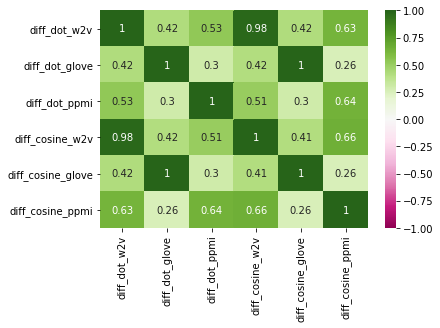

In [82]:
cols = [
    'diff_dot_w2v','diff_dot_glove','diff_dot_ppmi',
    'diff_cosine_w2v','diff_cosine_glove','diff_cosine_ppmi']
sns.heatmap(
    dat[cols].corr("spearman"), vmin=-1, vmax=1, cmap="PiYG", annot=True)

Las diferencias de cosenos W2V y PPMI tienen una correlación relativamente alta

## Regresión

Si las métricas de sesgo basadas en WE captan otras dimensiones además de las coocurrencias de primer y segundo orden, entonces en un modelo de regresión

$$
sesgo_{we} = \alpha_{0} + \alpha_{1}DPPMI + \alpha_{2}DCOSPPMI
$$

donde 

$$
DPPMI_{w} = PPMI(w,he) - PPMI(w,she)  
$$

$$
DCOSPPMI_{w} = cos(vecppmi_{w},vecppmi_{he}) - cos(vecppmi_{w},vecppmi_{she})
$$

la variabilidad no captada por los regresores debería ser bastante alta 

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [96]:
def modelo(df, y, x):
    """
    x: lista con nombres de covariables
    y: nombre de target
    """
    form = y + " ~ " + " + ".join(x)
    mod = ols(formula=form, data=df)
    res = mod.fit()
    print("Coeficientes\n", res.conf_int(), "\nR2\n", res.rsquared)

### En w2v

In [97]:
modelo(dat, "diff_dot_w2v", ["dppmi","diff_dot_ppmi"])

Coeficientes
                       0         1
Intercept     -0.066844 -0.062166
dppmi          0.480370  0.490187
diff_dot_ppmi  0.000261  0.000270 
R2
 0.19133277471788024


In [98]:
modelo(dat, "diff_cosine_w2v", ["dppmi","diff_cosine_ppmi"])

Coeficientes
                          0         1
Intercept         0.005100  0.005544
dppmi             0.023468  0.024490
diff_cosine_ppmi  4.813695  4.872061 
R2
 0.38641168257593417


In [99]:
modelo(
    dat, "diff_cosine_w2v"
    ,["dppmi","diff_cosine_ppmi","np.log(freq)","np.power(np.log(freq),2)"]) 

Coeficientes
                                   0         1
Intercept                  0.048807  0.052460
dppmi                      0.023097  0.024113
diff_cosine_ppmi           4.860835  4.919106
np.log(freq)              -0.015820 -0.014479
np.power(np.log(freq), 2)  0.000980  0.001092 
R2
 0.39354486365232266


Usando diferencia de cosenos, el R2 es de 38% y no crece significativamente una vez que se considera la frecuencia

Esto es evidencia de que los patrones observados en los sesgos se explican más por las coocurrencias de segundo orden (diferencia de cosenos de vectores PPMI) que por las frecuencias de las palabras.

### En GloVe

In [101]:
modelo(dat, "diff_dot_glove", ["dppmi","diff_dot_ppmi"])

Coeficientes
                       0         1
Intercept     -0.035103 -0.031415
dppmi          0.239917  0.247658
diff_dot_ppmi  0.000163  0.000170 
R2
 0.1007379350059574


In [102]:
modelo(dat, "diff_cosine_glove", ["dppmi","diff_cosine_ppmi"])

Coeficientes
                          0         1
Intercept        -0.009515 -0.009119
dppmi             0.019173  0.020085
diff_cosine_ppmi  1.649202  1.701319 
R2
 0.12629169333054424


In [103]:
modelo(
    dat, "diff_cosine_glove"
    ,["dppmi","diff_cosine_ppmi","np.log(freq)","np.power(np.log(freq),2)"]) 

Coeficientes
                                   0         1
Intercept                  0.104600  0.107753
dppmi                      0.018528  0.019405
diff_cosine_ppmi           1.721291  1.771577
np.log(freq)              -0.041001 -0.039844
np.power(np.log(freq), 2)  0.002948  0.003045 
R2
 0.19341359631423405


En GloVe las coocurrencias de primer y segundo orden no explican tanto la variabilidad en el sesgo como en w2v (R2 = 0.12)

La frecuencia de las palabras sí aumenta significativamente la variabilidad del sesgo explicada, a diferencia de w2v -- sin embargo, el residuo sigue siendo "alto" 

## Notas

Cuando se usa he vs. she las diferencias/patrones no son tan notables como cuando se usa un par de pronombres con diferencia más grande en las frecuencias:  
¿no conviene usar otro par para ilustrar/entender mejor el problema?

In [48]:
X = np.random.uniform(10, 20, size=(100,2))
Z = np.random.uniform(0, 1, size=(100,2))

dx = X[:,0] - X[:,1]
dz = Z[:,0] - Z[:,1]

abs(dx).mean(), abs(dz).mean()

(3.2797822849717475, 0.3246424077186612)